# CHATBOT INTELLIGENT USING NLP et machine learning

## BY SEZINE ARIELLE

#### La santé mentale fait référence à l'état de bien-être émotionnel, psychologique et social d'une personne. Elle influence la manière dont une personne pense, ressent, et agit, ainsi que sa capacité à gérer le stress, à nouer des relations et à prendre des décisions. La santé mentale est une composante essentielle de la santé globale et affecte tous les aspects de la vie d'une personne.

Développer un chatbot pour ***la santé mentale*** est crucial car il offre un accès immédiat et discret à un soutien psychologique, particulièrement pour les personnes qui peuvent hésiter à consulter un professionnel en raison de la stigmatisation ou des contraintes d'accessibilité. Les chatbots peuvent fournir des conseils, des ressources, et une écoute active 24/7, aidant ainsi à prévenir les crises en intervenant tôt. Ils permettent aussi de décharger les professionnels en offrant une première ligne de soutien, rendant les soins de santé mentale plus accessibles à un large public.

In [1]:
![sante_mentale](mental_health.jfif)

'[sante_mentale]' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


# Analyse exploratoire

In [2]:
# import des bibliotheques necéssaires pour la manipulation des données
import pandas as pd
import json
#chargement des bibliotheques necessaires pour le nlp
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder


# Télécharger les ressources 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SEZINE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SEZINE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SEZINE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#chargement des données
with open('KB.json','rb') as file:
    data=json.load(file)

In [4]:
### on transforme notre fichier json en dataframme pour le rendre plus lisible
df=pd.DataFrame(data['intents'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        80 non-null     object
 1   patterns   80 non-null     object
 2   responses  79 non-null     object
 3   response   1 non-null      object
dtypes: object(4)
memory usage: 2.6+ KB


la cellule ci haut nous permet de voir qu'il ya une entité dictionnaire ou on a mal nomée le champ responses on va donc le renomer

In [5]:
# recherche de l'index ou s'est produit l'erreur
for i,elt in enumerate(df['response']):
        print(f'{i}------------{elt}')


0------------nan
1------------nan
2------------nan
3------------nan
4------------nan
5------------nan
6------------nan
7------------nan
8------------nan
9------------nan
10------------nan
11------------nan
12------------nan
13------------nan
14------------nan
15------------nan
16------------nan
17------------nan
18------------nan
19------------nan
20------------nan
21------------nan
22------------nan
23------------["It's only natural to feel scared sometimes. Remember, you're not alone.", 'Feeling scared is okay. Take a deep breath and try to focus on something positive.', "When you're scared, it's important to reach out for support. You don't have to face it alone.", "Scared feelings are temporary. They will pass, and you'll feel stronger for having faced them.", 'Feeling scared is a normal human emotion. Be gentle with yourself as you navigate through it.', "Remember, it's okay to feel scared. Allow yourself to acknowledge your emotions without judgment.", "Feeling scared can be over

In [6]:
# on se rassure que dans cha

In [7]:
df["responses"][23]

nan

# preprocessing

In [8]:
#ayant remarquer que cette erreur s'est produite a la l'index 23, on la corrige
df["responses"][23]=df["response"][23]

In [9]:
df["responses"][23]

["It's only natural to feel scared sometimes. Remember, you're not alone.",
 'Feeling scared is okay. Take a deep breath and try to focus on something positive.',
 "When you're scared, it's important to reach out for support. You don't have to face it alone.",
 "Scared feelings are temporary. They will pass, and you'll feel stronger for having faced them.",
 'Feeling scared is a normal human emotion. Be gentle with yourself as you navigate through it.',
 "Remember, it's okay to feel scared. Allow yourself to acknowledge your emotions without judgment.",
 "Feeling scared can be overwhelming, but remember you've overcome challenges before.",
 "When you're scared, try grounding yourself in the present moment. What can you see, hear, touch?",
 "Feeling scared is a sign that you're stepping out of your comfort zone. Growth often comes from discomfort.",
 'Scared feelings can be a signal to slow down and take care of yourself. What do you need right now?',
 "It's okay to feel scared, but rem

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        80 non-null     object
 1   patterns   80 non-null     object
 2   responses  80 non-null     object
 3   response   1 non-null      object
dtypes: object(4)
memory usage: 2.6+ KB


In [11]:
# on supprime la colonne response qui ne sera par suite d'aucune utilité
df=df.drop(columns=['response'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,"[Good morning, Morning, Hello morning, Top of ...",[Good morning. I hope you had a good night's s...
2,afternoon,"[Good afternoon, Afternoon, Hello afternoon, G...","[Good afternoon. How is your day going?, After..."
3,evening,"[Good evening, Evening, Hello evening, Hey eve...","[Good evening. How has your day been?, Evening..."
4,night,"[Good night, Night, Hello night, Hey night]","[Good night. Get some proper sleep., Good nigh..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


Afin de créer nos données d’entraînement, nous devons d’abord effectuer certaines opérations sur nos données telles que :

- Créer un vocabulaire de tous les mots utilisés dans les patterns 

- Créer une liste des classes – Il s’agit simplement des tags de chaque intention.

- Créer une liste de tous les patterns dans le fichier des intentions.

- Créer une liste de touts les tags associés à chaque pattern dans le fichier intents.

In [12]:
classes=[]
vocabulary=[]
patterns=[]
tags=[]

for intent in data["intents"]: 
    for pattern in intent['patterns']:
        tokens=word_tokenize(pattern.lower())
        for mot in tokens:
            if mot not in vocabulary:
                vocabulary.append(mot)
                
    patterns.extend(intent['patterns'])

    tags.append(intent['tag'])

    if intent['tag'] not in classes:
        classes.append(intent['tag'])

In [13]:
len(classes)

80

In [14]:
len(vocabulary)

1921

In [15]:
vocabulary=[mot for mot in vocabulary if mot not in string.punctuation]
len(vocabulary)

1916

### lemmatisation des mots du vocabulaire

La lemmatisation est le processus de transformation d'un mot sous sa forme de base ou de "lemme", qui est la forme canonique ou le dictionnaire d'un mot. Contrairement à la racinisation (stemming), qui coupe les suffixes pour réduire un mot à sa racine, la lemmatisation utilise des règles linguistiques et des bases de données lexicales pour transformer un mot en une forme valide grammaticalement.En utilisant les lemmes, les algorithmes de NLP peuvent mieux comprendre le contexte d'un texte, ce qui est essentiel pour des tâches comme la classification de texte

Exemples :

- "running" devient "run"
- "better" devient "good"
- "geese" devient "goose"

In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
# Télécharger les ressources nécessaires pour lemmatizer (si ce n'est pas déjà fait)
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SEZINE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SEZINE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()
# Appliquer le lemmatizer
vocabulary_final = [lemmatizer.lemmatize(word) for word in vocabulary]

### Encodage de la target 

In [18]:

# Initialiser le Label Encoder
label_encoder = LabelEncoder()

# Convertir les étiquettes catégorielles en valeurs numériques
labels_numeriques = label_encoder.fit_transform(classes)
print(labels_numeriques)

[44 55  1 10 58 43 73 60 57  0 67  5 56 48 65 70 78  8 45  4  2 61 68 66
  6 74  9 72 47 46  7 49 64 79 71 52 69 42  3 63 59 51 76 53 77 62 75 50
 54 11 22 33 37 38 39 40 41 12 13 14 15 16 17 18 19 20 21 23 24 25 26 27
 28 29 30 31 32 34 35 36]


In [19]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df


,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
6250,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
6251,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
6252,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
6253,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [20]:
df['tag'].value_counts()

tag
worthless         1107
hate-you           694
scared             646
something-else     360
happy              348
                  ... 
fact-11              1
fact-10              1
fact-9               1
fact-8               1
fact-12              1
Name: count, Length: 80, dtype: int64

#### on doit maintenant mettre les patterns dans un format adequat en:
- rendant tout en miniscule
- tokenisant le texte
- lemmatisant le texte

In [21]:
df.shape[0]

6255

In [22]:
list(df['patterns'])

['Hi',
 'Hey',
 'Is anyone there?',
 'Hi there',
 'Hello',
 'Hey there',
 'Howdy',
 'Hola',
 'Bonjour',
 'Konnichiwa',
 'Guten tag',
 'Ola',
 'Namaste',
 'Salut',
 'Ciao',
 'Sawubona',
 'Good morning',
 'Morning',
 'Hello morning',
 'Top of the morning to you',
 'Good afternoon',
 'Afternoon',
 'Hello afternoon',
 'Good day',
 'Hey afternoon',
 'Good evening',
 'Evening',
 'Hello evening',
 'Hey evening',
 'Good night',
 'Night',
 'Good night',
 'Night',
 'Hello night',
 'Hey night',
 'Bye',
 'See you later',
 'Goodbye',
 'Au revoir',
 'Sayonara',
 'ok bye',
 'Bye then',
 'Fare thee well',
 'Take care',
 'So long',
 'Adios',
 'Later',
 'Catch you later',
 'Until next time',
 'Goodnight',
 'Ciao',
 'Thanks',
 'Thank you',
 "That's helpful",
 'Thanks for the help',
 'Thank you very much',
 'Appreciate it',
 'Cheers',
 'Gracias',
 'Much obliged',
 "You're the best",
 'Thanks a bunch',
 'You rock',
 '',
 'nothing much',
 'not much',
 "just chillin'",
 'same old, same old',
 'nothing new',


In [23]:
cleaned_patterns=[]
def preprocessing_patterns(df):
    for i in range (df.shape[0]):
        texte=df['patterns'][i]
        texte=texte.lower()
        tokens=word_tokenize(texte)
        tokens_no_punk=[mot for mot in tokens if mot not in string.punctuation]
        tokens_lem=[lemmatizer.lemmatize(mot) for mot in tokens_no_punk]
        tokens_char=' '.join(tokens_lem)
        cleaned_patterns.append(tokens_char)
    return cleaned_patterns

In [24]:
cleaned_patterns=preprocessing_patterns(df)
cleaned_patterns

['hi',
 'hey',
 'is anyone there',
 'hi there',
 'hello',
 'hey there',
 'howdy',
 'hola',
 'bonjour',
 'konnichiwa',
 'guten tag',
 'ola',
 'namaste',
 'salut',
 'ciao',
 'sawubona',
 'good morning',
 'morning',
 'hello morning',
 'top of the morning to you',
 'good afternoon',
 'afternoon',
 'hello afternoon',
 'good day',
 'hey afternoon',
 'good evening',
 'evening',
 'hello evening',
 'hey evening',
 'good night',
 'night',
 'good night',
 'night',
 'hello night',
 'hey night',
 'bye',
 'see you later',
 'goodbye',
 'au revoir',
 'sayonara',
 'ok bye',
 'bye then',
 'fare thee well',
 'take care',
 'so long',
 'adios',
 'later',
 'catch you later',
 'until next time',
 'goodnight',
 'ciao',
 'thanks',
 'thank you',
 "that 's helpful",
 'thanks for the help',
 'thank you very much',
 'appreciate it',
 'cheer',
 'gracias',
 'much obliged',
 "you 're the best",
 'thanks a bunch',
 'you rock',
 '',
 'nothing much',
 'not much',
 'just chillin',
 'same old same old',
 'nothing new',
 '

###  on commencera par subdiviser notre ensembe de donné en X et y:
 - X pour les patterns ou messages que nos utilisateurs peuvent taper,
 - y pour le tag, categorie a laquelle appartient le pattern ou message

In [25]:
X=cleaned_patterns
y=list(df['tag'])

In [26]:
print(len(X))
print(len(y))

6255
6255


In [27]:
import random
i= random.randint(0,6254)
print(X[i])
print(y[i])

you 're so unproductive to communicate with a an ai
hate-you


Le ***TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency)*** est une technique couramment utilisée pour transformer du texte en une matrice de caractéristiques numériques. Elle est particulièrement utile pour représenter des documents textuels en machine learning. Le TF-IDF combine deux concepts :

- Term Frequency (TF) : Le nombre de fois qu'un terme apparaît dans un document, par rapport au nombre total de termes dans ce document.
- Inverse Document Frequency (IDF) : Un poids qui diminue l'importance des termes très fréquents dans l'ensemble de documents, augmentant ainsi la valeur des termes rares.

Le résultat est une matrice où chaque terme a une valeur proportionnelle à son importance dans le document tout en étant ajustée pour sa fréquence globale dans le corpus.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialiser le vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Appliquer le TF-IDF sur le corpus
vectorizer_fited=tfidf_vectorizer.fit(X)
X_transformed= tfidf_vectorizer.fit_transform(X).toarray()
X_transformed.shape
y=pd.DataFrame(label_encoder.fit_transform(y))
y

,0
0,44
1,44
2,44
3,44
4,44
...,...
6250,32
6251,34
6252,35
6253,36


# Modelisation

### Subdivision des données 


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Afficher les formes des ensembles
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble d'entraînement :", y_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)
print("Taille de l'ensemble de test :", y_test.shape)

Taille de l'ensemble d'entraînement : (5004, 1812)
Taille de l'ensemble d'entraînement : (5004, 1)
Taille de l'ensemble de test : (1251, 1812)
Taille de l'ensemble de test : (1251, 1)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,  f1_score, recall_score

# Initialiser et entraîner le modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Prédire et évaluer la performance
y_pred_logistic = logistic_model.predict(X_test)
print("Précision du modèle de régression logistique :", accuracy_score(y_test, y_pred_logistic))
print("recall du modèle de régression logistique :", recall_score(y_test, y_pred_logistic,average='weighted'))
print("score-f1 du modèle de régression logistique :", f1_score(y_test, y_pred_logistic,average='weighted'))

# Initialiser et entraîner le modèle SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prédire et évaluer la performance
y_pred_svm = svm_model.predict(X_test)
print("Précision du modèle SVM :", accuracy_score(y_test, y_pred_svm))
print("recall du modèle SVM :", recall_score(y_test, y_pred_svm,average='weighted'))
print("score-f1 du modèle SVM :", f1_score(y_test, y_pred_svm,average='weighted'))

# Initialiser et entraîner le modèle Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prédire et évaluer la performance
y_pred_nb = nb_model.predict(X_test)
print("Précision du modèle Naive Bayes :", accuracy_score(y_test, y_pred_nb))
print("recall du modèle Naive Bayes :", recall_score(y_test, y_pred_nb,average='weighted'))
print("score-f1 du modèle Naive Bayes :", f1_score(y_test,y_pred_nb,average='weighted'))



C:\Users\SEZINE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Précision du modèle de régression logistique : 0.8689048760991207
recall du modèle de régression logistique : 0.8689048760991207
score-f1 du modèle de régression logistique : 0.8470477654395558


C:\Users\SEZINE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Précision du modèle SVM : 0.8792965627498002
recall du modèle SVM : 0.8792965627498002
score-f1 du modèle SVM : 0.8702779872691192


C:\Users\SEZINE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Précision du modèle Naive Bayes : 0.7737809752198241
recall du modèle Naive Bayes : 0.7737809752198241
score-f1 du modèle Naive Bayes : 0.72181595146236


C:\Users\SEZINE\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


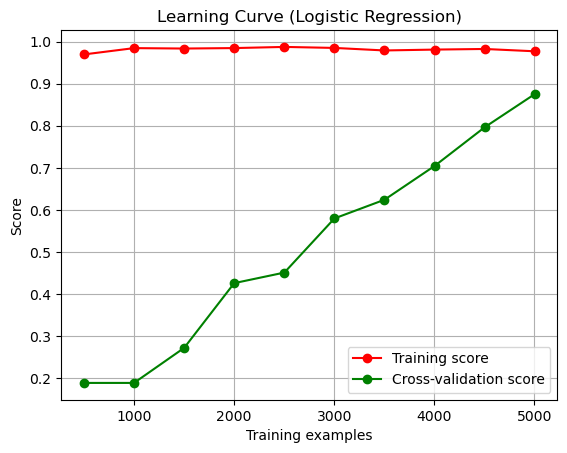

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_model, X_transformed, y,
                                                    cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculer les moyennes et écarts-types des scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Tracer la courbe de la précision moyenne et son écart-type pour l'ensemble d'entraînement
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Tracer la courbe de la précision moyenne et son écart-type pour l'ensemble de validation
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Initialiser le vectorizer
tfidf_vectorizer = TfidfVectorizer()
vectorizer_fited=tfidf_vectorizer.fit(X)
print('vectorizer fited')
# sauvegarde du vectorizer
with open('vectorizer_fited.pkl','wb') as file:
    pickle.dump(vectorizer_fited, file)
    
print('vectorizer saved')

#sauvegarde du model
with open('svm_model.pkl','wb' ) as file:
    pickle.dump(svm_model,file)
print('model sauvegarder')

vectorizer fited
vectorizer saved
model sauvegarder


In [34]:
vectorizer_fited

TfidfVectorizer()

In [35]:
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import random

lemmatizer=WordNetLemmatizer()

# chargement du vectorizer
with open('vectorizer_fited.pkl','rb') as file:
    loaded_vectorizer=pickle.load(file)
print('vectorizer_loaded')

#chargement du model
with open('svm_model.pkl','rb') as file:
    model=pickle.load(file)
print('model loaded')

#chargement des données initiales
with open('KB.json','rb') as file:
    data=json.load(file)

def deployement_model(texte):
    l=[]
    texte=texte.lower()
    texte=word_tokenize(texte)
    texte=[mot for mot in texte if mot not in string.punctuation]
    texte=[lemmatizer.lemmatize(mot) for mot in texte]
    texte=' '.join(texte)
    l.append(texte)
    texte=loaded_vectorizer.transform(l).toarray()
    pred=model.predict(texte)
    tag=label_encoder.inverse_transform(pred)
    print(tag)
    for elt in data['intents']:
        if elt['tag']==tag:
            response= random.choice(elt['responses'])  
            break
    return response
    
    

vectorizer_loaded
model loaded


In [36]:
deployement_model('who create you')

['creation']


'My creation was a blend of technology and creativity.'

In [ ]:
while True:
    message = input("")
    result =deployement_model(message)
    #print(f"\046[--AI_NAIROBI : {result}")
    print(f"\033[{45}m --AI_NAIROBI : {result}\033[0m")

HI
['greeting']
 --AI_NAIROBI : Guten tag! What brings you here?
what's your name
['creation']
 --AI_NAIROBI : The creators behind me are innovative developers.
close your mout
['default']
 --AI_NAIROBI : That's a significant issue. Please tell me more.
am a failure
['default']
 --AI_NAIROBI : I'm all ears. Please continue sharing.
i want to die
['suicide']
 --AI_NAIROBI : You're important and loved. Call 9152987821 to speak with someone who can assist you.
no
['casual']
 --AI_NAIROBI : No big deal.
help me
['help']
 --AI_NAIROBI : Absolutely, I'm here to assist you. What's the problem?


### Deep learning approche using LSTM

In [ ]:
import tensorflow as tf

In [39]:
def print_colored(text, color_code):
    print(f"\033[{color_code}m{text}\033[0m")

# Exemple d'utilisation
print_colored("Texte en rouge", "31")
print_colored("Texte en vert avec fond jaune", "32;43")
print_colored("Texte en bleu avec fond blanc", "34;47")

Texte en rouge
Texte en vert avec fond jaune
Texte en bleu avec fond blanc
